**Name:** Mohammad Mohammadi

**Student Number:** 402208592

**Instructor:** Dr. Alireza Zarei

**Course:** Seminar on Machine Learning Algorithms (Computer Science)

**Sharif University of Technology (SUT)**

**Department of Math and Copmuter Sciences**

# Introduction
This notebook is a project for the seminar of Machine Learning Algorithms (Computer Sciences) in winter semester in Sharif University of Technology, department of Math and Computer Sciences, where we were each given a task to pick a dataset from https://archive.ics.uci.edu/ and choose a machine learning algorithm and perform some task on them and report the result. I chose the dataset of Dry Bean (id: 602) which is a dataset of images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains. Then I will apply a Random Forest algorithm to perform a classification task and will report the result.

To utilize this dataset for classification, we'll need to first clearly define our objectives and then follow a series of steps to prepare and analyze the data. Our objective is as below:

We wan to define a classification task as: 

Since the dataset includes labeled images of seven different types of dry beans, we can build a supervised learning model to predict the type of bean based on its features. This is useful for automating the sorting process in industries or for academic purposes, in our case it is the second one, to test different classification algorithms.

# Step 1: Setup and Data Loading

First, let's set up the environment and load the dataset.

## Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA


## Fetch dataset

In [23]:
# Fetch dataset
dry_bean = fetch_ucirepo(id=602)

# print(dry_bean.data.features.head())

# Data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# Ensure y is a pandas Series and has correct dimensions
if not isinstance(y, pd.Series):
    y = y.iloc[:, 0]  # Assuming the target is in the first column
    y.name = 'Type'
    

# Display metadata
print("Metadata:")
print(dry_bean.metadata)

# Display variable information
print("Variable information:")
print(dry_bean.variables)

# Quick look at the data
print("Quick look at the data:")
print(X.head())
print(y.head())

Metadata:
{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and 

# Step 2: Data Exploration and Visualization
Let's explore the data to understand it better.

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

  

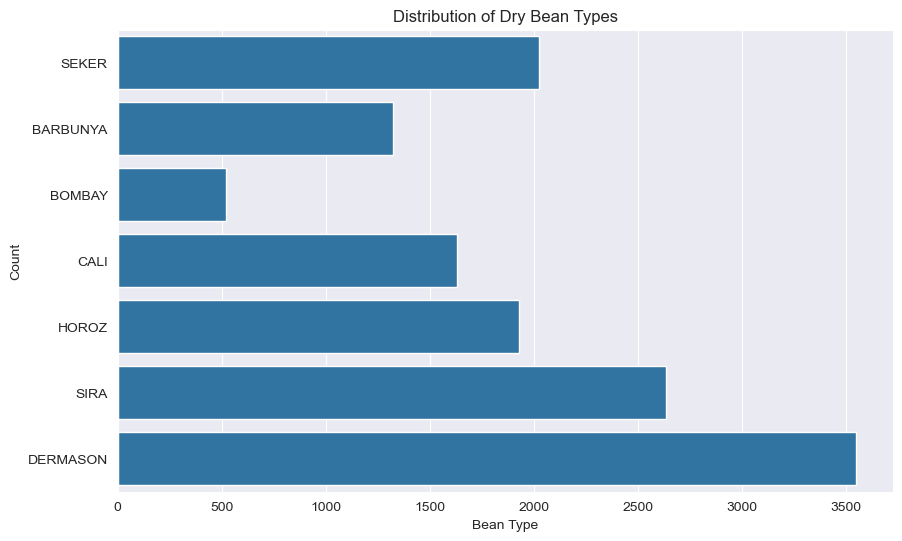

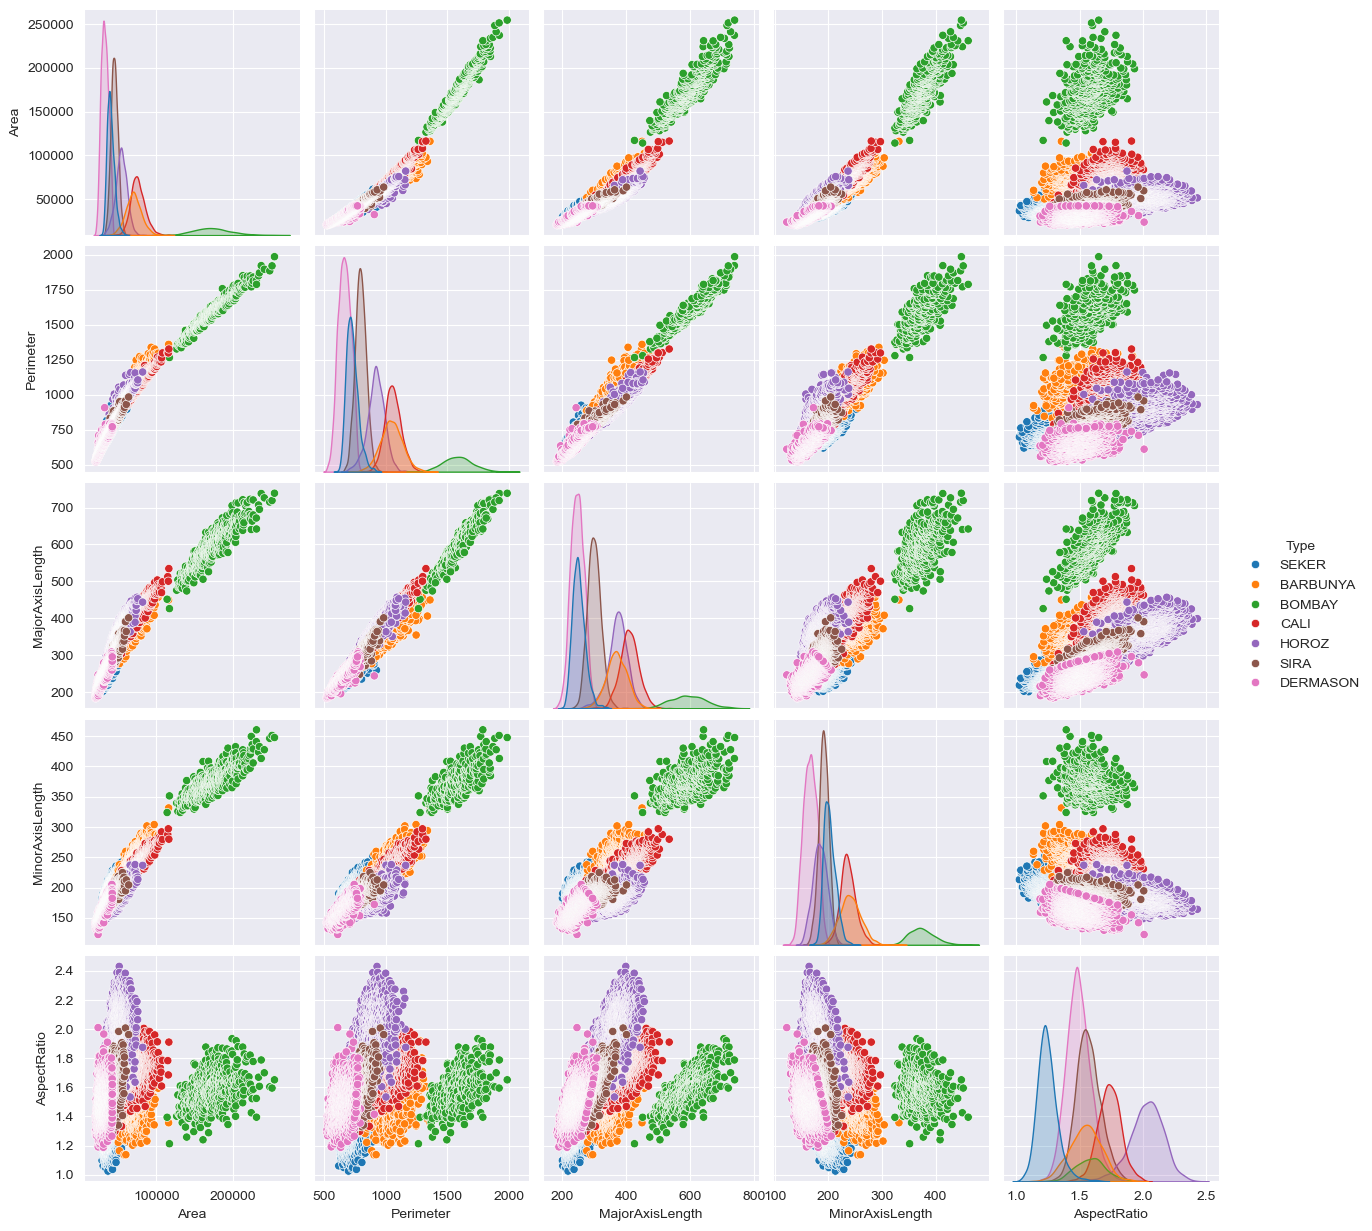

In [27]:
# Check for missing values
print(X.isnull().sum())

# Statistical summary
print(X.describe())

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(y=y)
plt.title('Distribution of Dry Bean Types')
plt.xlabel('Bean Type')
plt.ylabel('Count')
plt.show()

# Pairplot for a subset of features to visualize relationships
sns.pairplot(pd.concat([X.iloc[:, :5], y], axis=1), hue='Type')  # Include 'Type' column for hue
plt.show()


# Step 3: Data Preprocessing
Standardize the features and split the data into training and testing sets.

In [28]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')


Training set shape: (10888, 16)
Test set shape: (2723, 16)


# Step 4: Model Training
We'll start with a Random Forest classifier as a baseline model.

In [29]:
# Initialize and train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9254498714652957
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.94      0.93       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.88      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723

Confusion Matrix:
 [[236   0  17   0   1   1   6]
 [  0 117   0   0   0   0   0]
 [ 13   0 299   0   3   1   1]
 [  0   0   0 620   2   4  45]
 [  2   0   7   3 390   0   6]
 [  3   0   0  14   0 387   9]
 [  0   0   1  52   5   7 471]]


# Step 5: PCA for Visualization
Applying PCA to visualize the data in 2D.

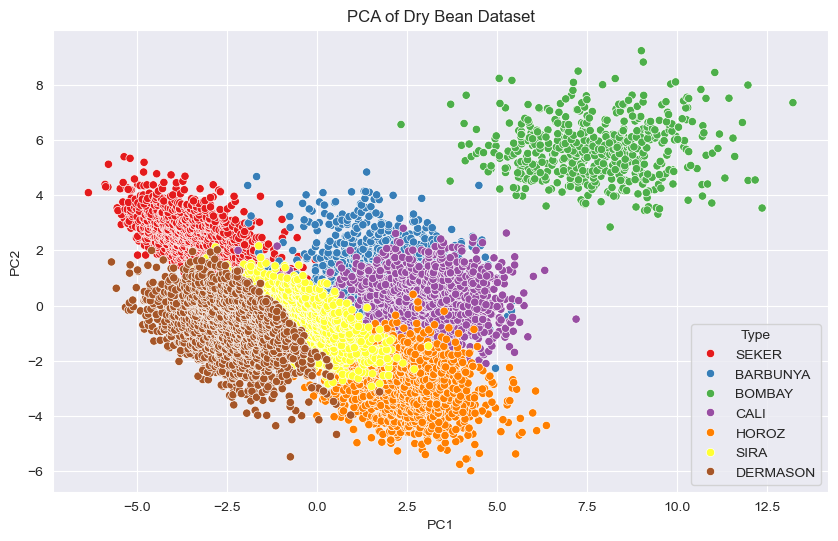

In [31]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Type'] = y

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Type', data=df_pca, palette='Set1')
plt.title('PCA of Dry Bean Dataset')
plt.show()
